In [521]:
cd /Users/anshupriyasrivastava/Desktop/Udacity/Udacity ML Nanodegree/Fake-Job-Posting-Prediction

/Users/anshupriyasrivastava/Desktop/Udacity/Udacity ML Nanodegree/Fake-Job-Posting-Prediction


In [522]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")

In [523]:
fake_job_postings = pd.read_csv('data/fake_job_postings.csv')

In [524]:
fake_job_postings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [525]:
fake_job_postings.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [526]:
fake_job_postings.location = fake_job_postings.location.fillna('blank')

In [527]:
fake_job_postings_US = fake_job_postings[fake_job_postings['location'].str.contains("US")]

In [528]:
loc_split =[]
for loc in fake_job_postings_US.location:
    loc_split.append(loc.split(','))

loc_split = pd.DataFrame(loc_split)

loc_split = loc_split[[1, 2]]

loc_split = loc_split.rename(columns={1: "state", 2:'city'})

In [529]:
len(fake_job_postings_US)/len(fake_job_postings)

0.5959731543624162

In [530]:
fake_job_postings_US = fake_job_postings_US.reset_index()

In [531]:
fake_job_postings_US = fake_job_postings_US.join(loc_split)

In [532]:
fake_job_postings_US = fake_job_postings_US[['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'state', 'city']]

In [533]:
fake_job_postings_US = fake_job_postings_US[fake_job_postings_US['city'].notna()]
fake_job_postings_US = fake_job_postings_US[fake_job_postings_US['state'].notna()]

In [534]:
fake_job_postings_US.shape

(10593, 20)

In [535]:
fake_job_postings_US['state_city'] = fake_job_postings_US['state'] + ", " + fake_job_postings_US['city']

In [536]:
fake_job_postings_US.isna().sum()

job_id                    0
title                     0
location                  0
department             7567
salary_range           9064
company_profile        2037
description               0
requirements           1744
benefits               4638
telecommuting             0
has_company_logo          0
has_questions             0
employment_type        1754
required_experience    4267
required_education     4460
industry               2672
function               3889
fraudulent                0
state                     0
city                      0
state_city                0
dtype: int64

In [537]:
fake_job_postings_US.city = fake_job_postings_US.city.str.strip()
fake_job_postings_US.state = fake_job_postings_US.state.str.strip()

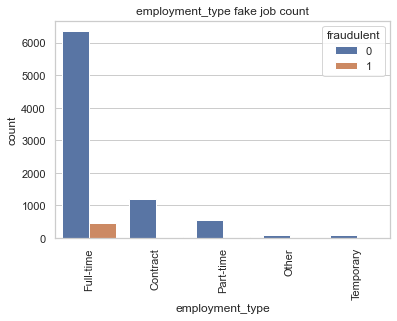

In [538]:
sns_countplot('employment_type')

In [539]:
fake_job_postings_US

job_id                                              title  \
0           1                                   Marketing Intern   
1           3            Commissioning Machinery Assistant (CMA)   
2           4                  Account Executive - Washington DC   
3           5                                Bill Review Manager   
4           6                                   Accounting Clerk   
...       ...                                                ...   
10651   17873                                    Product Manager   
10652   17874                             Recruiting Coordinator   
10653   17875                               JavaScript Developer   
10654   17877                                 Payroll Accountant   
10655   17878  Project Cost Control Staff Engineer - Cost Con...   

                    location           department  salary_range  \
0           US, NY, New York            Marketing           NaN   
1              US, IA, Wever                  NaN           NaN   
2         US, DC, Washington                Sales           NaN   
3         US, FL, Fort Worth                  NaN           NaN   
4                   US, MD,                   NaN           NaN   
...                      ...                  ...           ...   
10651  US, CA, San Francisco  Product Development           NaN   
10652      US, NC, Charlotte                  NaN           NaN   
10653                 US, ,                   NaN  80000-100000   
10654   US, PA, Philadelphia           Accounting           NaN   
10655        US, TX, Houston                  NaN           NaN   

                                         company_profile  \
0      We're Food52, and we've created a groundbreaki...   
1      Valor Services provides Workforce Solutions th...   
2      Our passion for improving quality of life thro...   
3      SpotSource Solutions LLC is a Global Human Cap...   
4                                                    NaN   
...                                                  ...   
10651  Flite delivers ad innovation at scale to the w...   
10652                                                NaN   
10653                                                NaN   
10654  WebLinc is the e-commerce platform and service...   
10655  We Provide Full Time Permanent Positions for m...   

                                             description  \
0      Food52, a fast-growing, James Beard Award-winn...   
1      Our client, located in Houston, is actively se...   
2      THE COMPANY: ESRI – Environmental Systems Rese...   
3      JOB TITLE: Itemization Review ManagerLOCATION:...   
4      Job OverviewApex is an environmental consultin...   
...                                                  ...   
10651  Flite's SaaS display ad platform fuels the wor...   
10652  RESPONSIBILITIES:Will facilitate the recruitin...   
10653  Sr, JavaScript Developer Experience : 4-10 yea...   
10654  The Payroll Accountant will focus primarily on...   
10655  Experienced Project Cost Control Staff Enginee...   

                                            requirements  \
0      Experience with content management systems a m...   
1      Implement pre-commissioning and commissioning ...   
2      EDUCATION: Bachelor’s or Master’s in GIS, busi...   
3      QUALIFICATIONS:RN license in the State of Texa...   
4                                                    NaN   
...                                                  ...   
10651  BA/BS in Computer Science or a related technic...   
10652  REQUIRED SKILLS:Associates Degree or a combina...   
10653                                                NaN   
10654  - B.A. or B.S. in Accounting- Desire to have f...   
10655  At least 12 years professional experience.Abil...   

                                                benefits  telecommuting  ...  \
0                                                    NaN              0  ...   
1                                                    NaN      

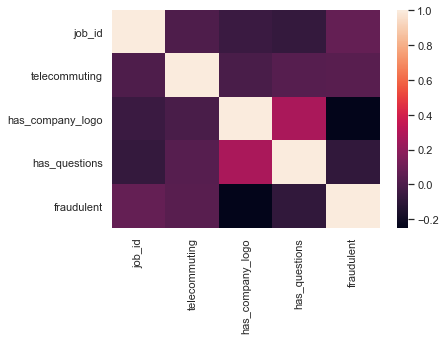

In [540]:
corr = fake_job_postings_US.corr()
sns.heatmap(corr)
plt.show()

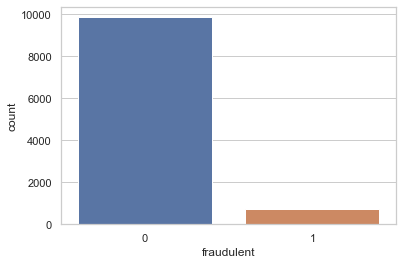

In [541]:
sns.countplot(x='fraudulent', data=fake_job_postings_US);

In [542]:
def sns_countplot(feature):
    sns.countplot(x=feature, data=fake_job_postings_US, hue="fraudulent",
              order=fake_job_postings_US[feature].value_counts().iloc[:10].index)
    plt.xticks(rotation=90)
    title = feature + ' fake job count'
    plt.title('Location Fake Jobs')
    plt.show()

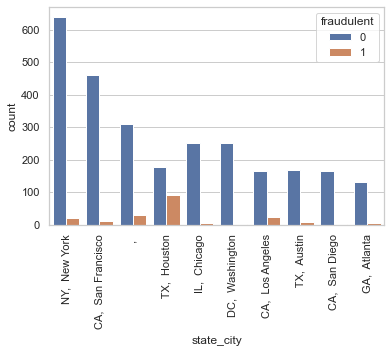

In [543]:
sns.countplot(x='state_city', data=fake_job_postings_US, hue="fraudulent", order=fake_job_postings_US['state_city'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

In [544]:
def sns_countplot(feature):
    sns.countplot(x=feature, data=fake_job_postings_US, hue="fraudulent",
              order=fake_job_postings_US[feature].value_counts().iloc[:10].index)
    plt.xticks(rotation=90)
    title = feature + ' fake job count'
    plt.title(title)
    plt.show()

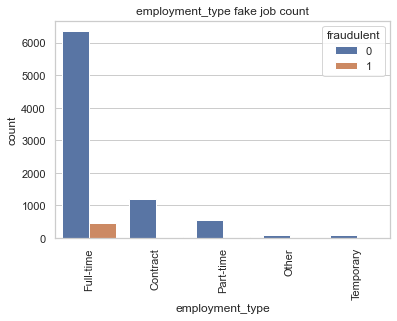

In [545]:
sns_countplot('employment_type');

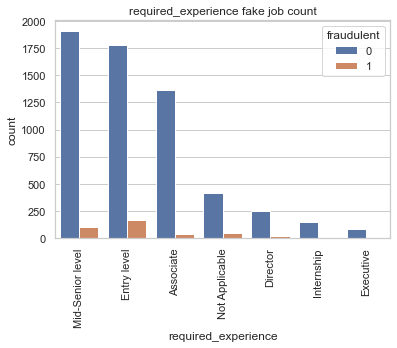

In [546]:
sns_countplot('required_experience');

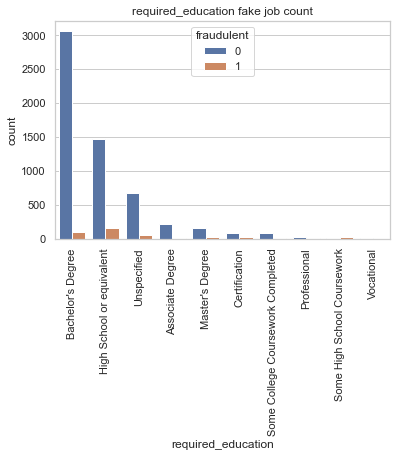

In [547]:
sns_countplot('required_education');

In [548]:
location_ratio = round(fake_job_postings_US[fake_job_postings_US.fraudulent == 1].groupby('state_city').state_city.count()/fake_job_postings_US[fake_job_postings_US.fraudulent == 0].groupby('state_city').state_city.count(), 2)
location_ratio = pd.DataFrame({'state_city':location_ratio.index, 'ratio':location_ratio.values})

In [549]:
fake_job_postings_US = fake_job_postings_US.merge(location_ratio)

In [550]:
fake_job_postings_US.ratio.fillna(0, inplace=True)

In [551]:
location_ratio_plot = location_ratio[location_ratio.ratio >= 1]

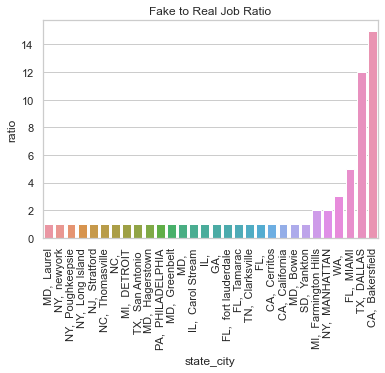

In [552]:
sns.barplot(data=location_ratio_plot.sort_values(by='ratio'), x='state_city', y='ratio')
plt.xticks(rotation=90)
plt.title('Fake to Real Job Ratio')
plt.show()

In [553]:
def missing_count(feature, title='None'):
    y_axis = fake_job_postings_US[fake_job_postings_US[feature].isna()][['fraudulent', feature]]
    y_axis = y_axis.fraudulent.value_counts()
    y_axis.plot(kind='bar')
    plt.ylabel('Count')
    plt.xlabel('Category')
    title = "Number of empty " + title + " in fraudulent and non-fraudulent"
    plt.title(title)
    plt.xticks(rotation=0)
    plt.show()
    return 0

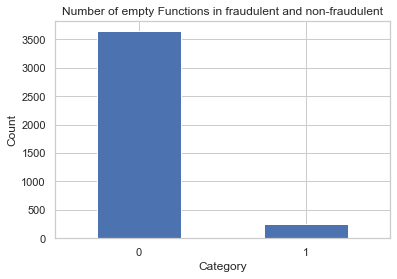

0

In [554]:
missing_count('function', 'Functions')

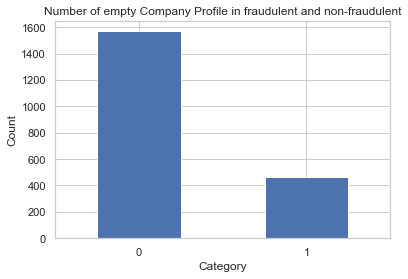

0

In [555]:
missing_count('company_profile', 'Company Profile')

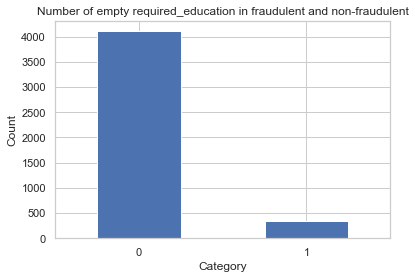

0

In [556]:
missing_count('required_education', 'required_education')

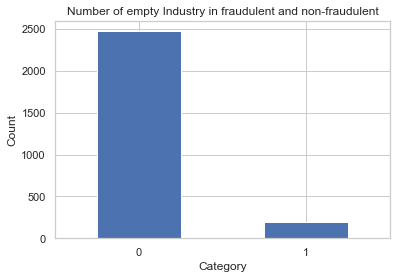

0

In [557]:
missing_count('industry', 'Industry')

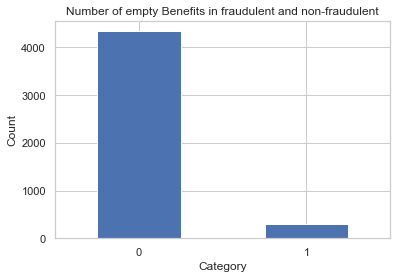

0

In [558]:
missing_count('benefits', 'Benefits')

In [559]:
telecommuting_list = []
has_company_logo_list = []

for idx, tel, logo in zip(range(len(fake_job_postings_US)), fake_job_postings_US.telecommuting, fake_job_postings_US.has_company_logo):
    if fake_job_postings.fraudulent[idx] == 1:
        telecommuting_list.append(tel)
        has_company_logo_list.append(logo)
    else:
        pass

telecommuting_logo_df = pd.DataFrame({'telecommuting':telecommuting_list, 'has_company_logo':has_company_logo_list})

In [560]:
fake_count = 0

for fraud, tel, logo in zip(fake_job_postings_US.fraudulent, fake_job_postings_US.telecommuting, fake_job_postings_US.has_company_logo):
    if (tel == 0 and logo == 0):
        if (fraud == 1):
            fake_count +=1
        else:
            pass
    else:
        pass


print(fake_count)

425


In [561]:
len(fake_job_postings_US[fake_job_postings_US.fraudulent == 1])

725

In [562]:
fake_count/len(fake_job_postings_US[fake_job_postings_US.fraudulent == 1]) * 100

58.620689655172406

In [563]:
fake_job_postings_US.fillna(" ",inplace = True)

fake_job_postings_US['text'] =  fake_job_postings_US['title'] + ' ' + fake_job_postings_US['location'] + ' ' + fake_job_postings_US['company_profile'] + ' ' + \
        fake_job_postings_US['description'] + ' ' + fake_job_postings_US['requirements'] + ' ' + fake_job_postings_US['benefits'] + ' ' + \
        fake_job_postings_US['required_experience'] + ' ' + fake_job_postings_US['required_education'] + ' ' + fake_job_postings_US['industry'] + ' ' + fake_job_postings_US['function']


fake_job_postings_US.drop(['job_id', 'department', 'salary_range', 'title','location','department','company_profile','description','requirements','benefits','employment_type','required_experience','required_education','industry','function', 'city', 'state', 'state_city'], axis = 1, inplace = True)

In [564]:
fake_job_postings_US

telecommuting  has_company_logo  has_questions  fraudulent  ratio  \
0                  0                 1              0           0   0.03   
1                  0                 1              0           0   0.03   
2                  0                 1              0           0   0.03   
3                  0                 1              0           0   0.03   
4                  0                 1              1           0   0.03   
...              ...               ...            ...         ...    ...   
10588              1                 1              1           1   0.00   
10589              0                 1              1           0   0.00   
10590              0                 1              0           0   0.00   
10591              0                 0              0           0   0.00   
10592              0                 1              0           0   0.00   

                                                    text  
0      Marketing Intern US, NY, New York We're Food52...  
1      Visual Designer US, NY, New York Kettle is an ...  
2      Payroll Tax Specialist US, NY, New York Namely...  
3      Marketing Manager US, NY, New York Super Socce...  
4      English Teacher Abroad US, NY, New York We hel...  
...                                                  ...  
10588  Military Benefits Counselor US, , chicago Anth...  
10589  Sr.Business Intelligence Technical Architect U...  
10590  Licensed Practical Nurse (LPN)- Private Duty U...  
10591  SAS Grid Developer US, NJ, Berkeley Heights   ...  
10592  Sr. Scm Web Development Technical Lead US, CA,...  

[10593 rows x 6 columns]

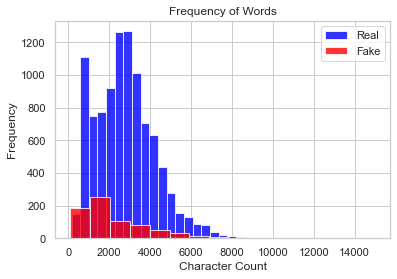

In [565]:
fake_job_postings_US['character_count'] = fake_job_postings_US.text.apply(len)

fake_job_postings_US[fake_job_postings_US.fraudulent==0].character_count.plot(bins=35, kind='hist', color='blue', 
                                       label='Real', alpha=0.8)
fake_job_postings_US[fake_job_postings_US.fraudulent==1].character_count.plot(kind='hist', color='red', 
                                       label='Fake', alpha=0.8)
plt.legend()
plt.title('Frequency of Words')
plt.xlabel("Character Count");

## Text Analysis

In [566]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer

In [572]:
text = fake_job_postings_US.text.to_list()
text = ' '.join(text)
tokens_text = word_tokenize(text)

In [576]:
lower_tokens = [t.lower() for t in tokens_text]
word_freq = Counter(lower_tokens)
print(Counter.most_common(word_freq, 10))

[(',', 190674), ('...', 116523), ('us', 84744), ('ny', 52965), ('new', 52965), ('york', 52965), (':', 31779), ('marketing', 21186), ('we', 21186), ('technical', 21186)]


In [577]:
text_only_alphabets = [t for t in lower_tokens if t.isalpha()]

In [580]:
english_stopped = stopwords.words('english')
no_stops = [t for t in text_only_alphabets if t not in english_stopped]

In [583]:
wordnet_lemmatizer = WordNetLemmatizer()

lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]
bow = Counter(lemmatized)
print(Counter.most_common(bow, 10))

[('u', 105930), ('ny', 52965), ('new', 52965), ('york', 52965), ('marketing', 21186), ('technical', 21186), ('intern', 10593), ('visual', 10593), ('designer', 10593), ('kettle', 10593)]


In [588]:
fake_job_postings_US.to_csv('data/fake_job_postings_cleaned.csv')

In [590]:
fake_job_postings_US.shape

(10593, 7)